### 2) Use the HR Promotion Dataset given below to build a clustering model. Before building the model, handle the missing values in the data. 
### - 1) What should be the ideal number of clusters.
### - 2) What do you infer from the clusters?

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data1 = pd.read_csv(r'C:\Users\SHREE\Downloads\Assignments\Module 7 - Assignment\HR Promotion.csv')
data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Getting more information about dataset

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
data1.shape

(54808, 14)

Dropping unwanted column

In [5]:
data1.drop(['employee_id'], axis=1, inplace=True)

Visualizing the missing values using missingo function

<AxesSubplot:>

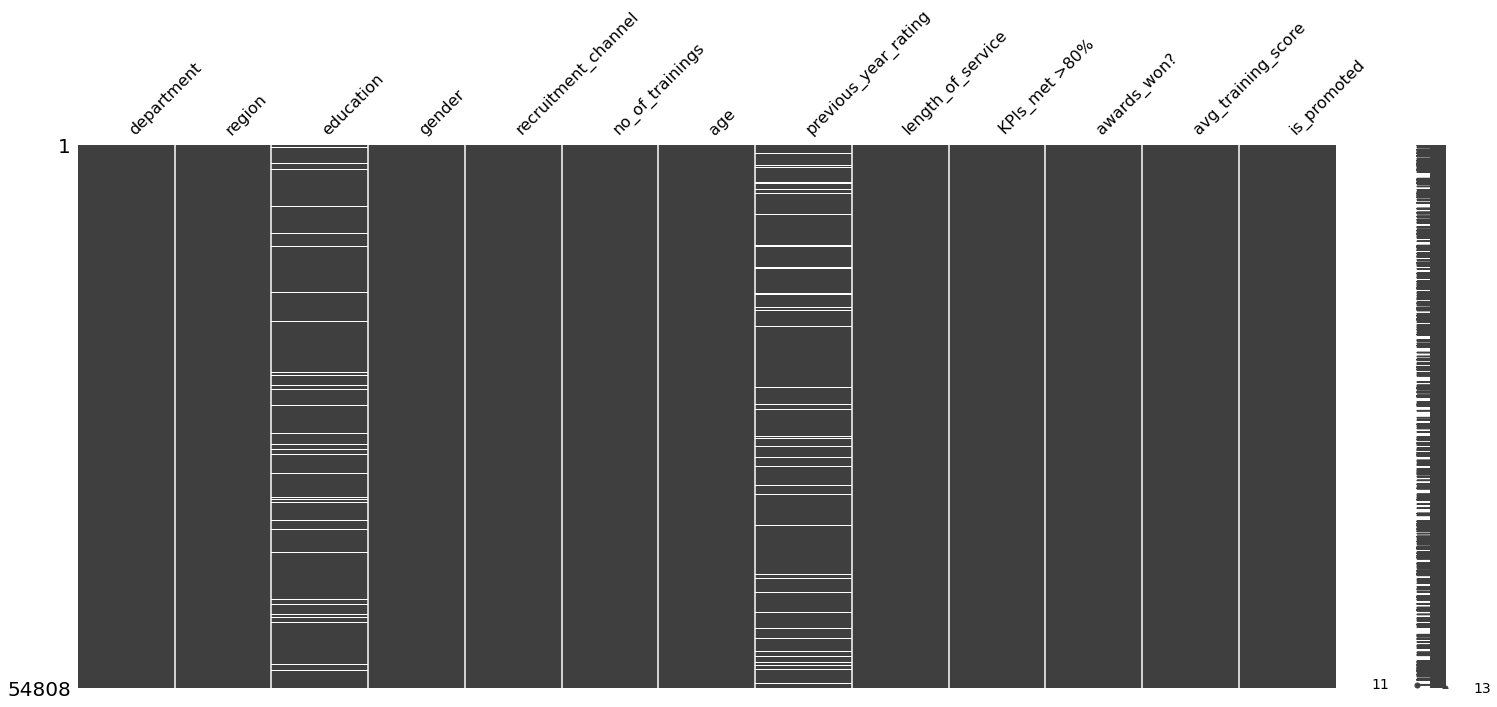

In [6]:
msno.matrix(data1)

<AxesSubplot:>

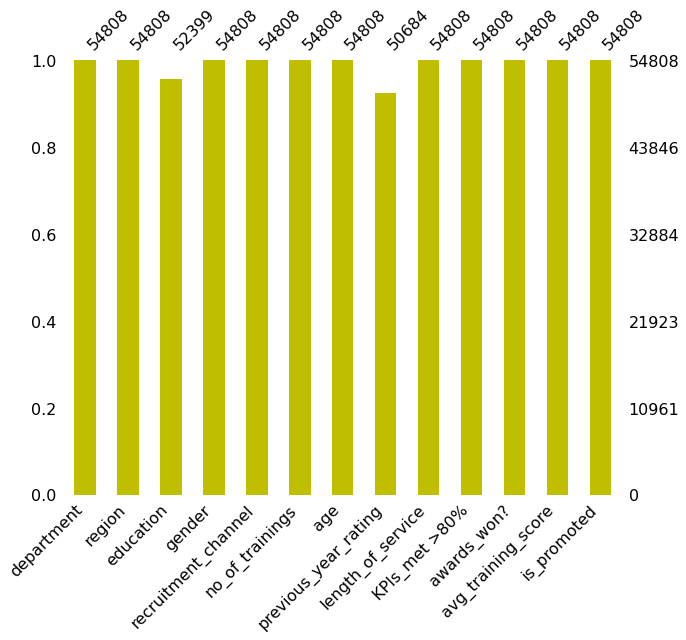

In [7]:
msno.bar(data1, color = 'y', figsize = (10,8))

Checking missing values

In [8]:
(data1.isnull().sum())/len(data1)

department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

Filling missing values

In [9]:
data1['education'].fillna(data1['education'].mode()[0], inplace = True)
data1['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
data1.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Convert categorical & float variable into integers with Label Encoding

In [10]:
le = LabelEncoder()
data1['department'] = le.fit_transform(data1['department'])
data1['region'] = le.fit_transform(data1['region'])
data1['education'] = le.fit_transform(data1['education'])
data1['gender'] = le.fit_transform(data1['gender'])
data1['recruitment_channel'] = le.fit_transform(data1['recruitment_channel'])
data1['previous_year_rating'] = data1['previous_year_rating'].astype(int)
data1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5,8,1,0,49,0
1,4,14,0,1,0,1,30,5,4,0,0,60,0
2,7,10,0,1,2,1,34,3,7,0,0,50,0
3,7,15,0,1,0,2,39,1,10,0,0,50,0
4,8,18,0,1,0,1,45,3,2,0,0,73,0


Feature Scaling 

In [11]:
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)

Elbow method to find the ideal number of clusters

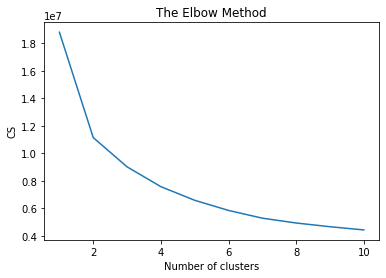

In [12]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

K-Means model with two clusters 

In [13]:
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(data1)

labels = kmeans.labels_

In [14]:
kmeans.cluster_centers_

array([[5.10049284e+00, 1.53397393e+01, 5.25881427e-01, 7.12490158e-01,
        8.70490799e-01, 1.22282815e+00, 3.50156601e+01, 3.13726634e+00,
        5.95853139e+00, 3.38252019e-01, 1.73514916e-02, 5.42410545e+01,
        5.57289085e-02],
       [4.75937028e+00, 1.55781060e+01, 6.15197154e-01, 6.85480333e-01,
        8.64258907e-01, 1.30345567e+00, 3.44500171e+01, 3.18194668e+00,
        5.71004533e+00, 3.74908612e-01, 3.28995467e-02, 7.86723693e+01,
        1.34376371e-01]])

In [15]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data1.columns])
cluster_centers

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,5.100493,15.339739,0.525881,0.71249,0.870491,1.222828,35.015660,3.137266,5.958531,0.338252,0.017351,54.241055,0.055729
1,4.759370,15.578106,0.615197,0.68548,0.864259,1.303456,34.450017,3.181947,5.710045,0.374909,0.032900,78.672369,0.134376


In [16]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [data1.columns])
cluster_centers

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,17.754747,149.879846,1.027058,1.028138,1.721852,1.998029,303.027349,7.416072,31.278978,0.513519,0.025782,788.667621,0.100726
1,16.899886,151.969100,1.106499,1.015789,1.715741,2.047152,298.694468,7.476772,30.219171,0.531025,0.028121,1115.349420,0.122679


In [17]:
data1_cluster = pd.concat([data1, pd.DataFrame({'cluster': labels})], axis = 1)
data1_cluster.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,cluster
0,7,31,2,0,2,1,35,5,8,1,0,49,0,0
1,4,14,0,1,0,1,30,5,4,0,0,60,0,0
2,7,10,0,1,2,1,34,3,7,0,0,50,0,0
3,7,15,0,1,0,2,39,1,10,0,0,50,0,0
4,8,18,0,1,0,1,45,3,2,0,0,73,0,1


PCA (principal component analysis

In [18]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data1_scaled)
principal_comp

array([[-14.01670647, -14.04255854],
       [ -3.11305916,  -1.23866861],
       [-13.60439249,   4.02489269],
       ...,
       [ 15.7896932 ,  10.68978843],
       [-17.57460518, -19.6729517 ],
       [-13.88243912,  -2.94036769]])

In [19]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-14.016706,-14.042559
1,-3.113059,-1.238669
2,-13.604392,4.024893
3,-13.756411,2.180063
4,9.129794,1.812219


In [20]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-14.016706,-14.042559,0
1,-3.113059,-1.238669,0
2,-13.604392,4.024893,0
3,-13.756411,2.180063,0
4,9.129794,1.812219,1


Visualizing Clusters

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

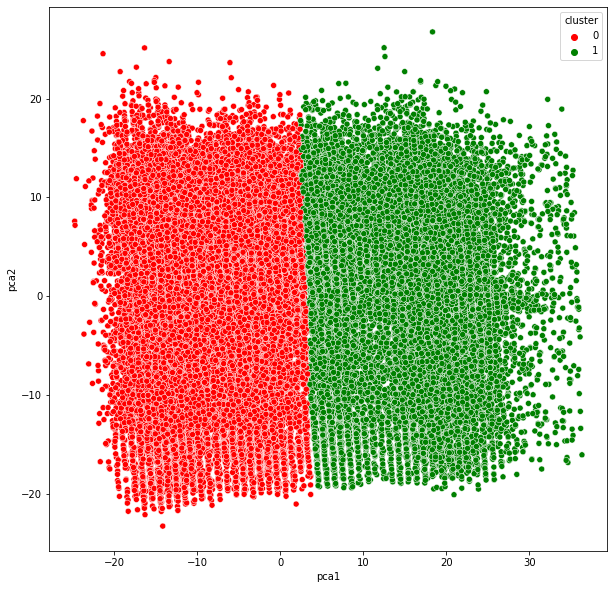

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green'])

### - 1) What should be the ideal number of clusters.
### The ideal number of clusters should be 2 according to the elbow method, the elbow curve flattens after the number of cluster as 2. So the the ideal number of cluster should be 2.

### - 2) What do you infer from the clusters?
### I have grouped the similar datapoints into a cluster. First I have formed the 2 clusters based on elbow method as the ideal number for cluster is 2 according to elbow method. Then I have applied Principal Component Analysis for Dimensionality Reduction for making better clusters. So the similar data points get clustered very well & we can see in the above figure the clear picture of 2 clusters.